In [39]:
from IPython.display import Image
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

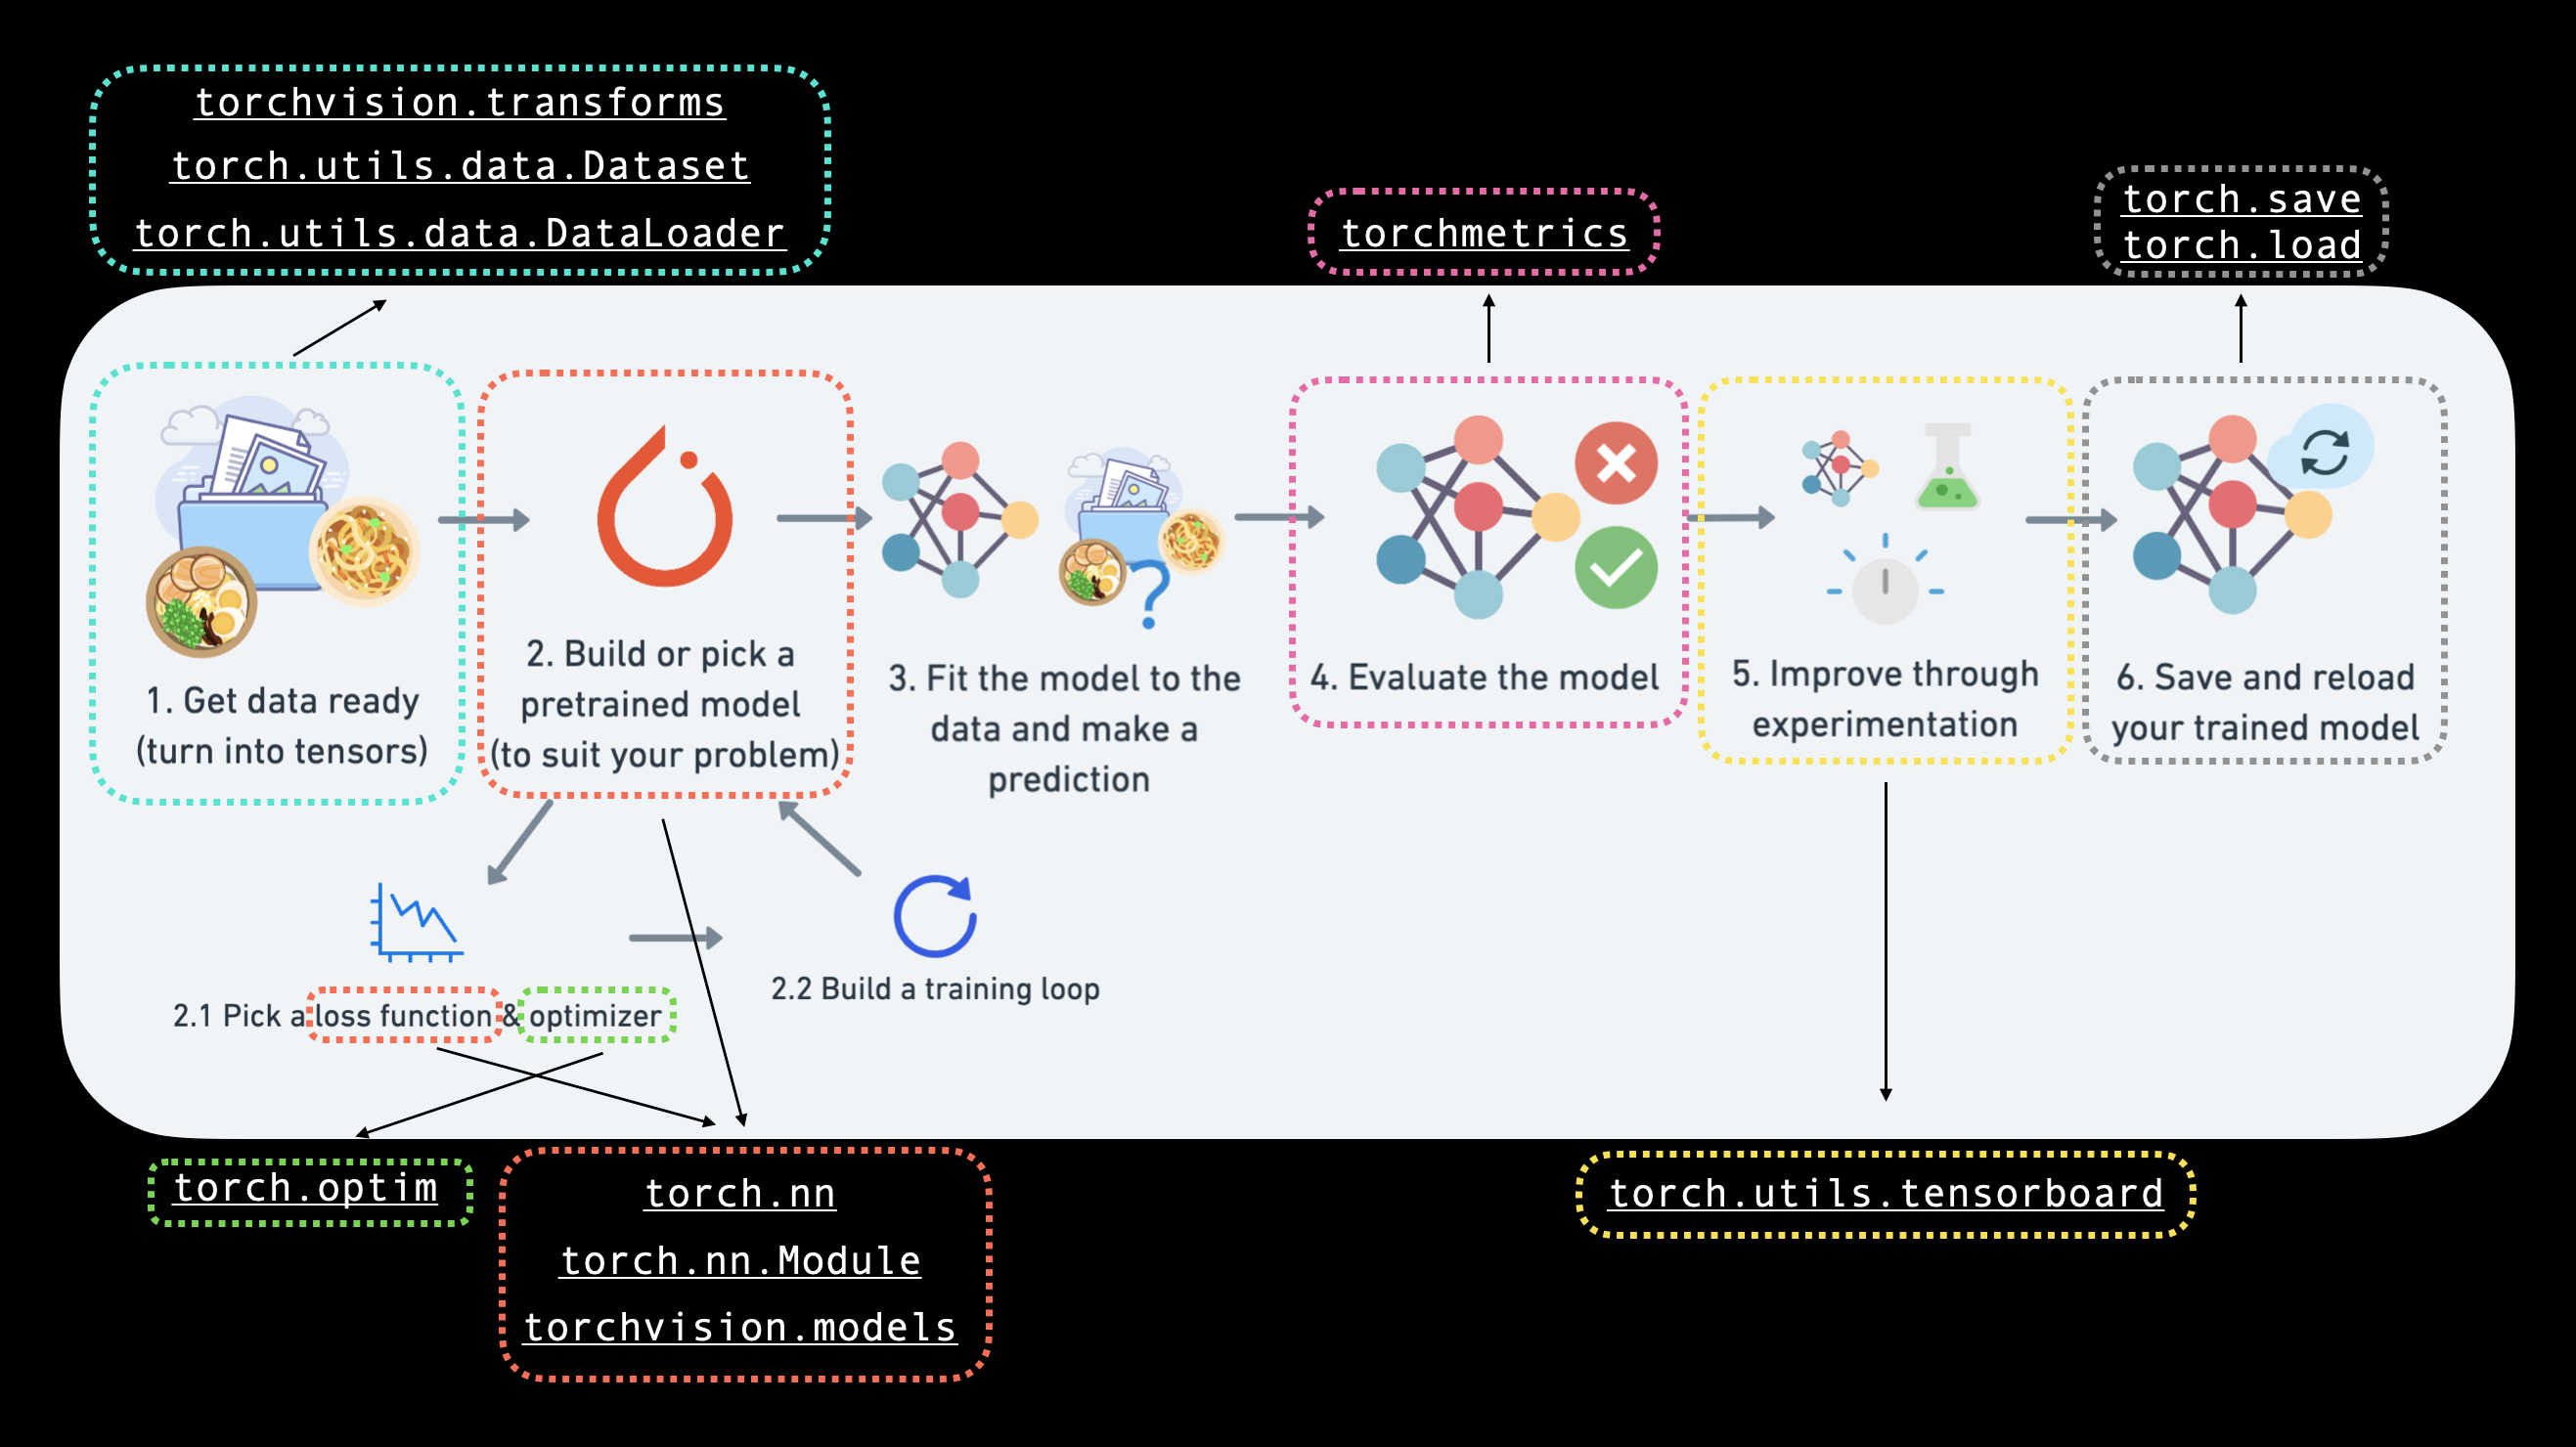

In [3]:
# Show the image
image_url = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-pytorch-computer-vision-workflow.png"
Image(image_url, width=800, height=400)

In [42]:
import torch as th
import torchvision as tv
import torchvision.transforms as tvt
import torchmetrics as tm


# Check the torch version
print(th.__version__)

1.13.1+cu117


#### Getting a Dataset

In [5]:
# Doenload training and test datasets

train_set = tv.datasets.FashionMNIST(
    root='./data/FashionMNIST',
    train=True,
    download=True,
    transform=tvt.Compose([
        tvt.ToTensor(),
    ])
)

test_set = tv.datasets.FashionMNIST(
    root='./data/FashionMNIST',
    train=False,
    download=True,
    transform=tvt.Compose([
        tvt.ToTensor(),
    ])
)

In [6]:
# See samples of the data
sample = next(iter(train_set))

# Check the sample
print("Sample: ", sample)
print(f"image shape: {sample[0].shape} \n label: {sample[1]}")

Sample:  (tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.015

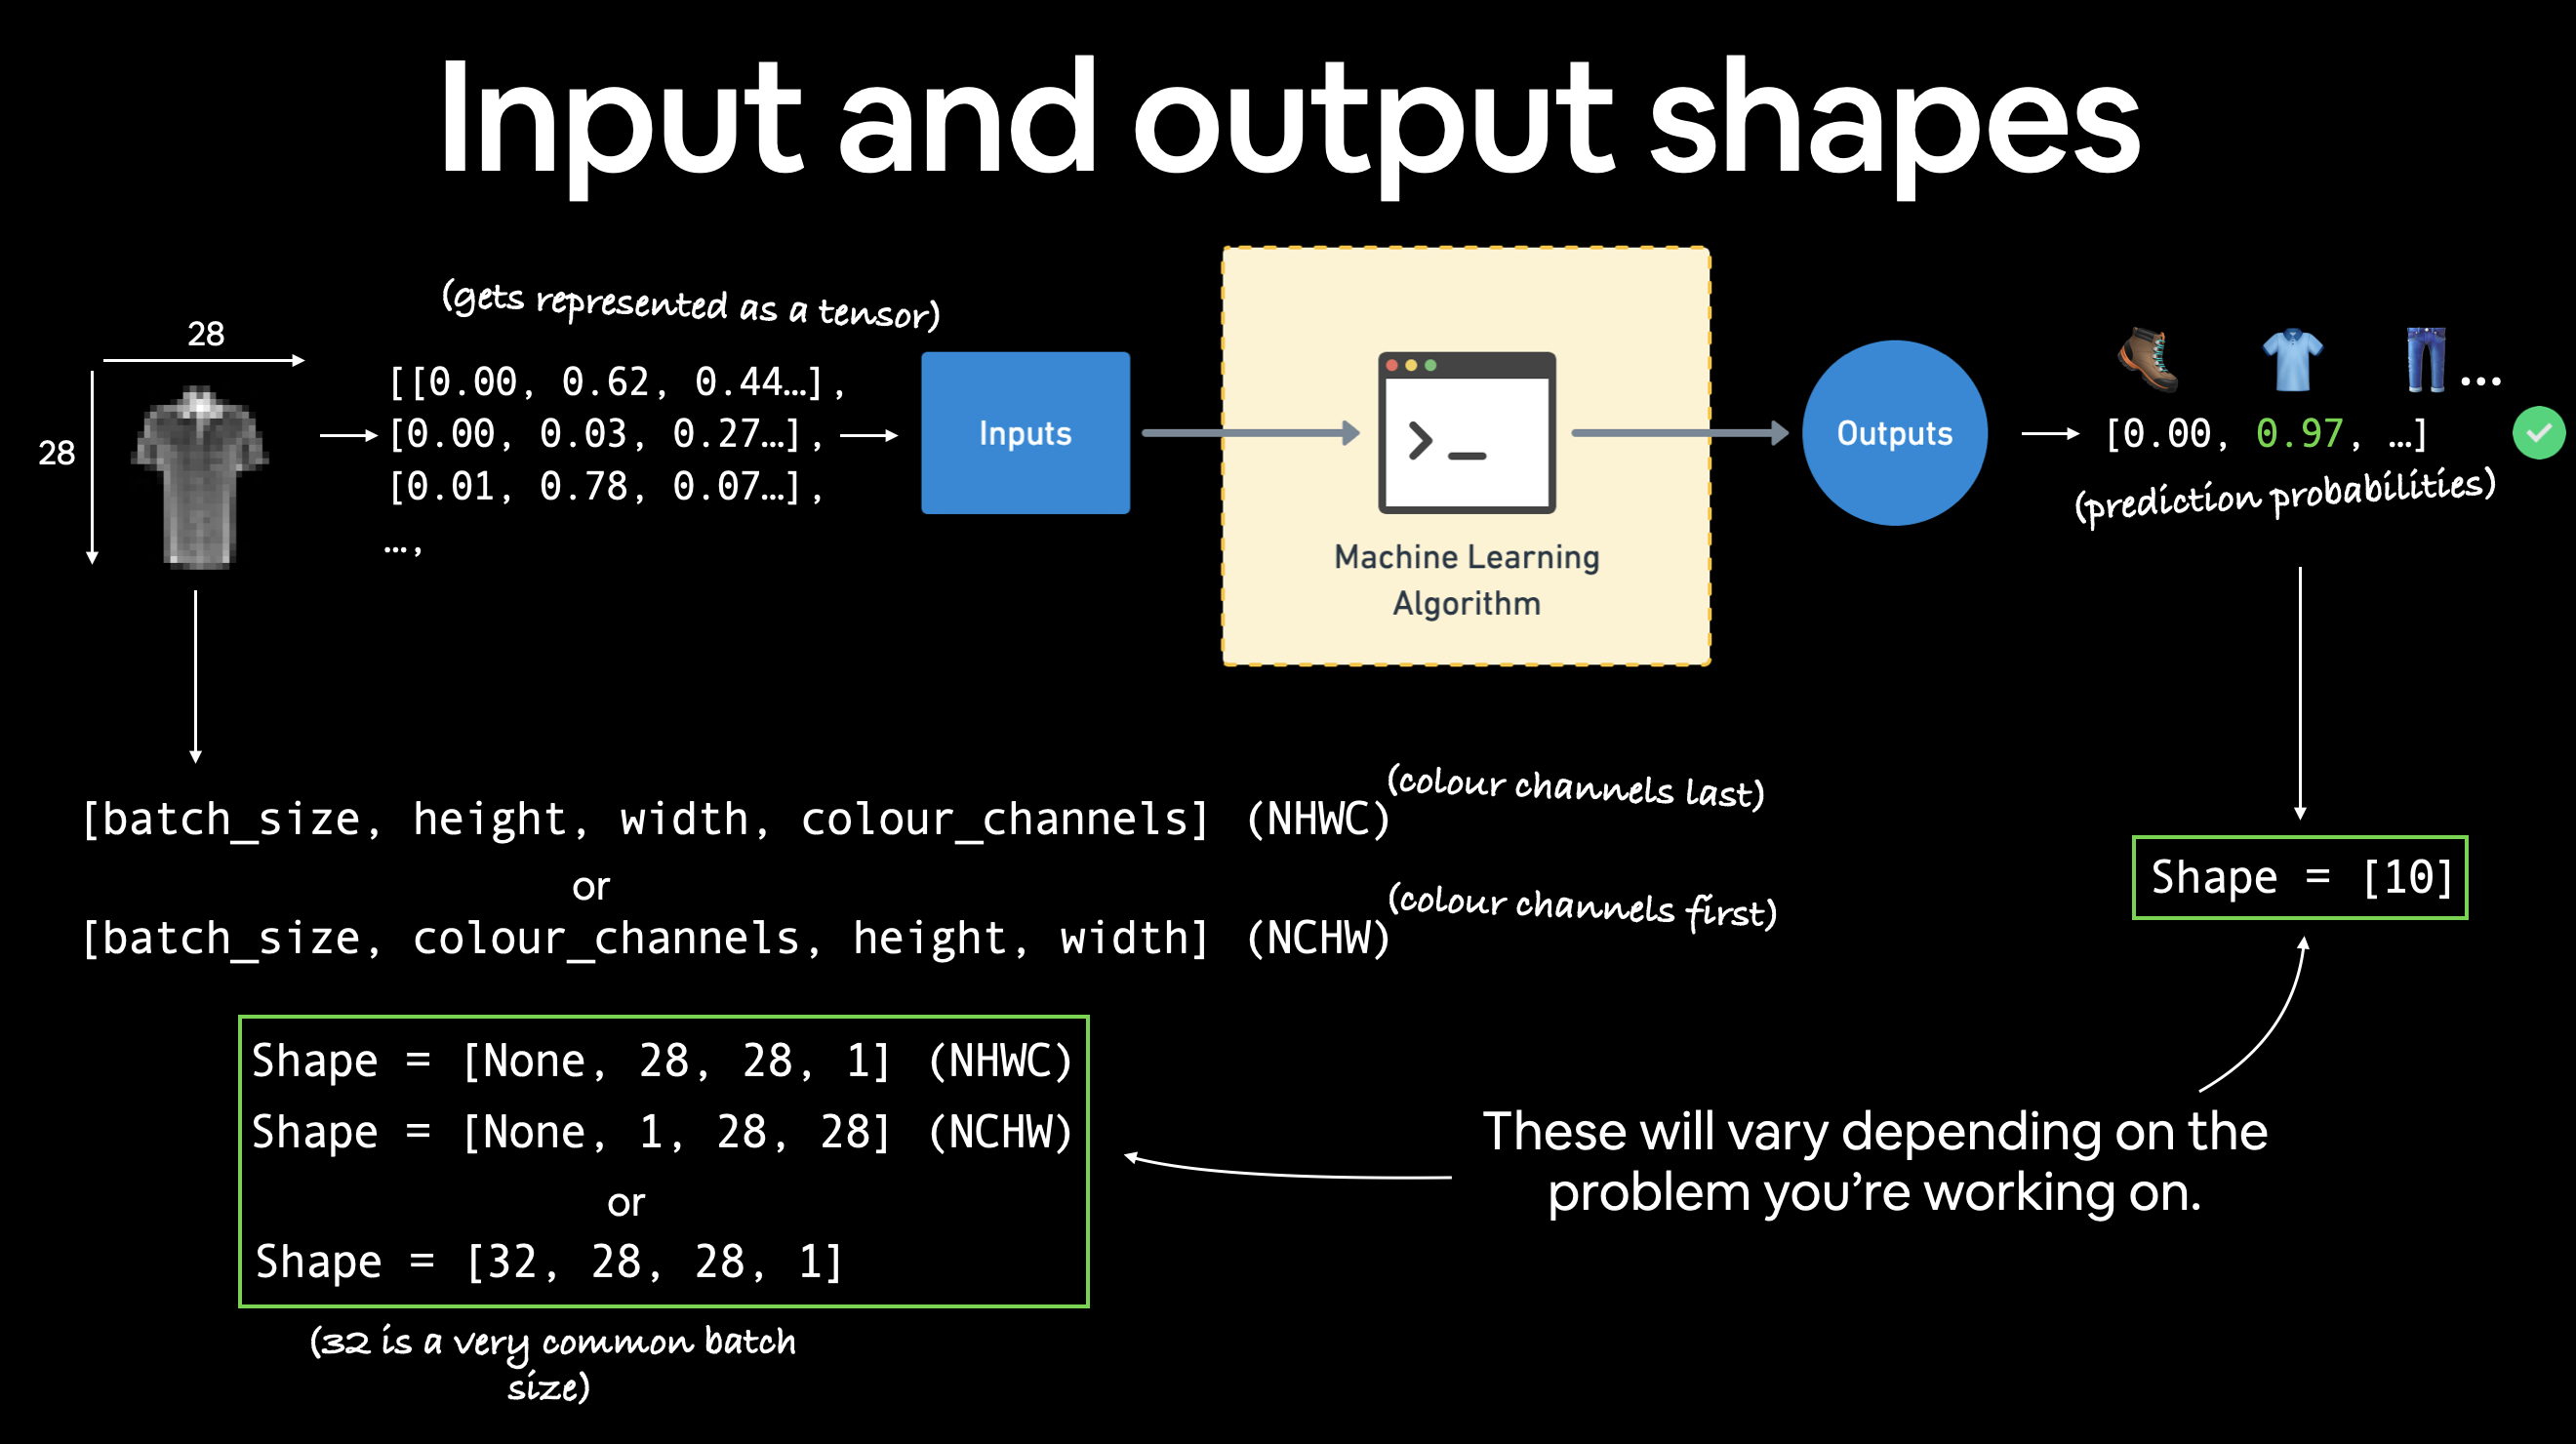

In [7]:
# Show the image
image_url = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-computer-vision-input-and-output-shapes.png"
Image(image_url, width=800, height=400)

In [8]:
# Get the number of training and test samples
print(f"Number of training samples: {len(train_set)}")
print(f"Number of test samples: {len(test_set)}")

# Get the number of classes
print(f"Number of classes: {len(train_set.classes)}")

# Get the name of classes 
print(f"Classes: {train_set.classes}")

Number of training samples: 60000
Number of test samples: 10000
Number of classes: 10
Classes: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


#### Visualizing the Dataset

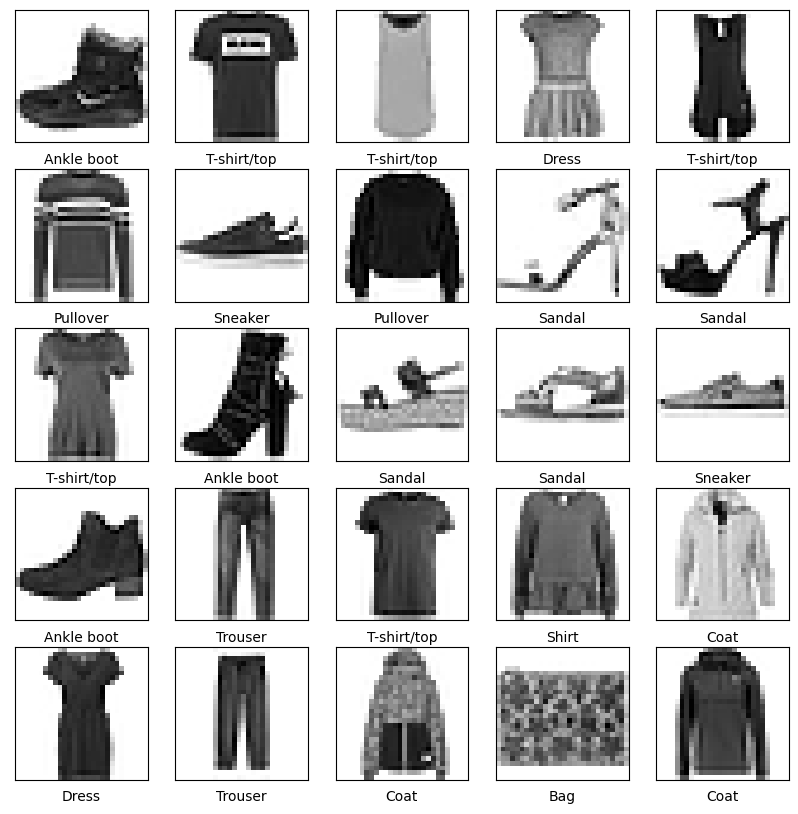

In [9]:
# get the samples of the training set
train_samples = train_set.data
x_train = train_samples.float() / 255.0

y_train = train_set.targets

# Visualize a few samples of the training set
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(train_set.classes[y_train[i]])

#### Prepare DataLoader

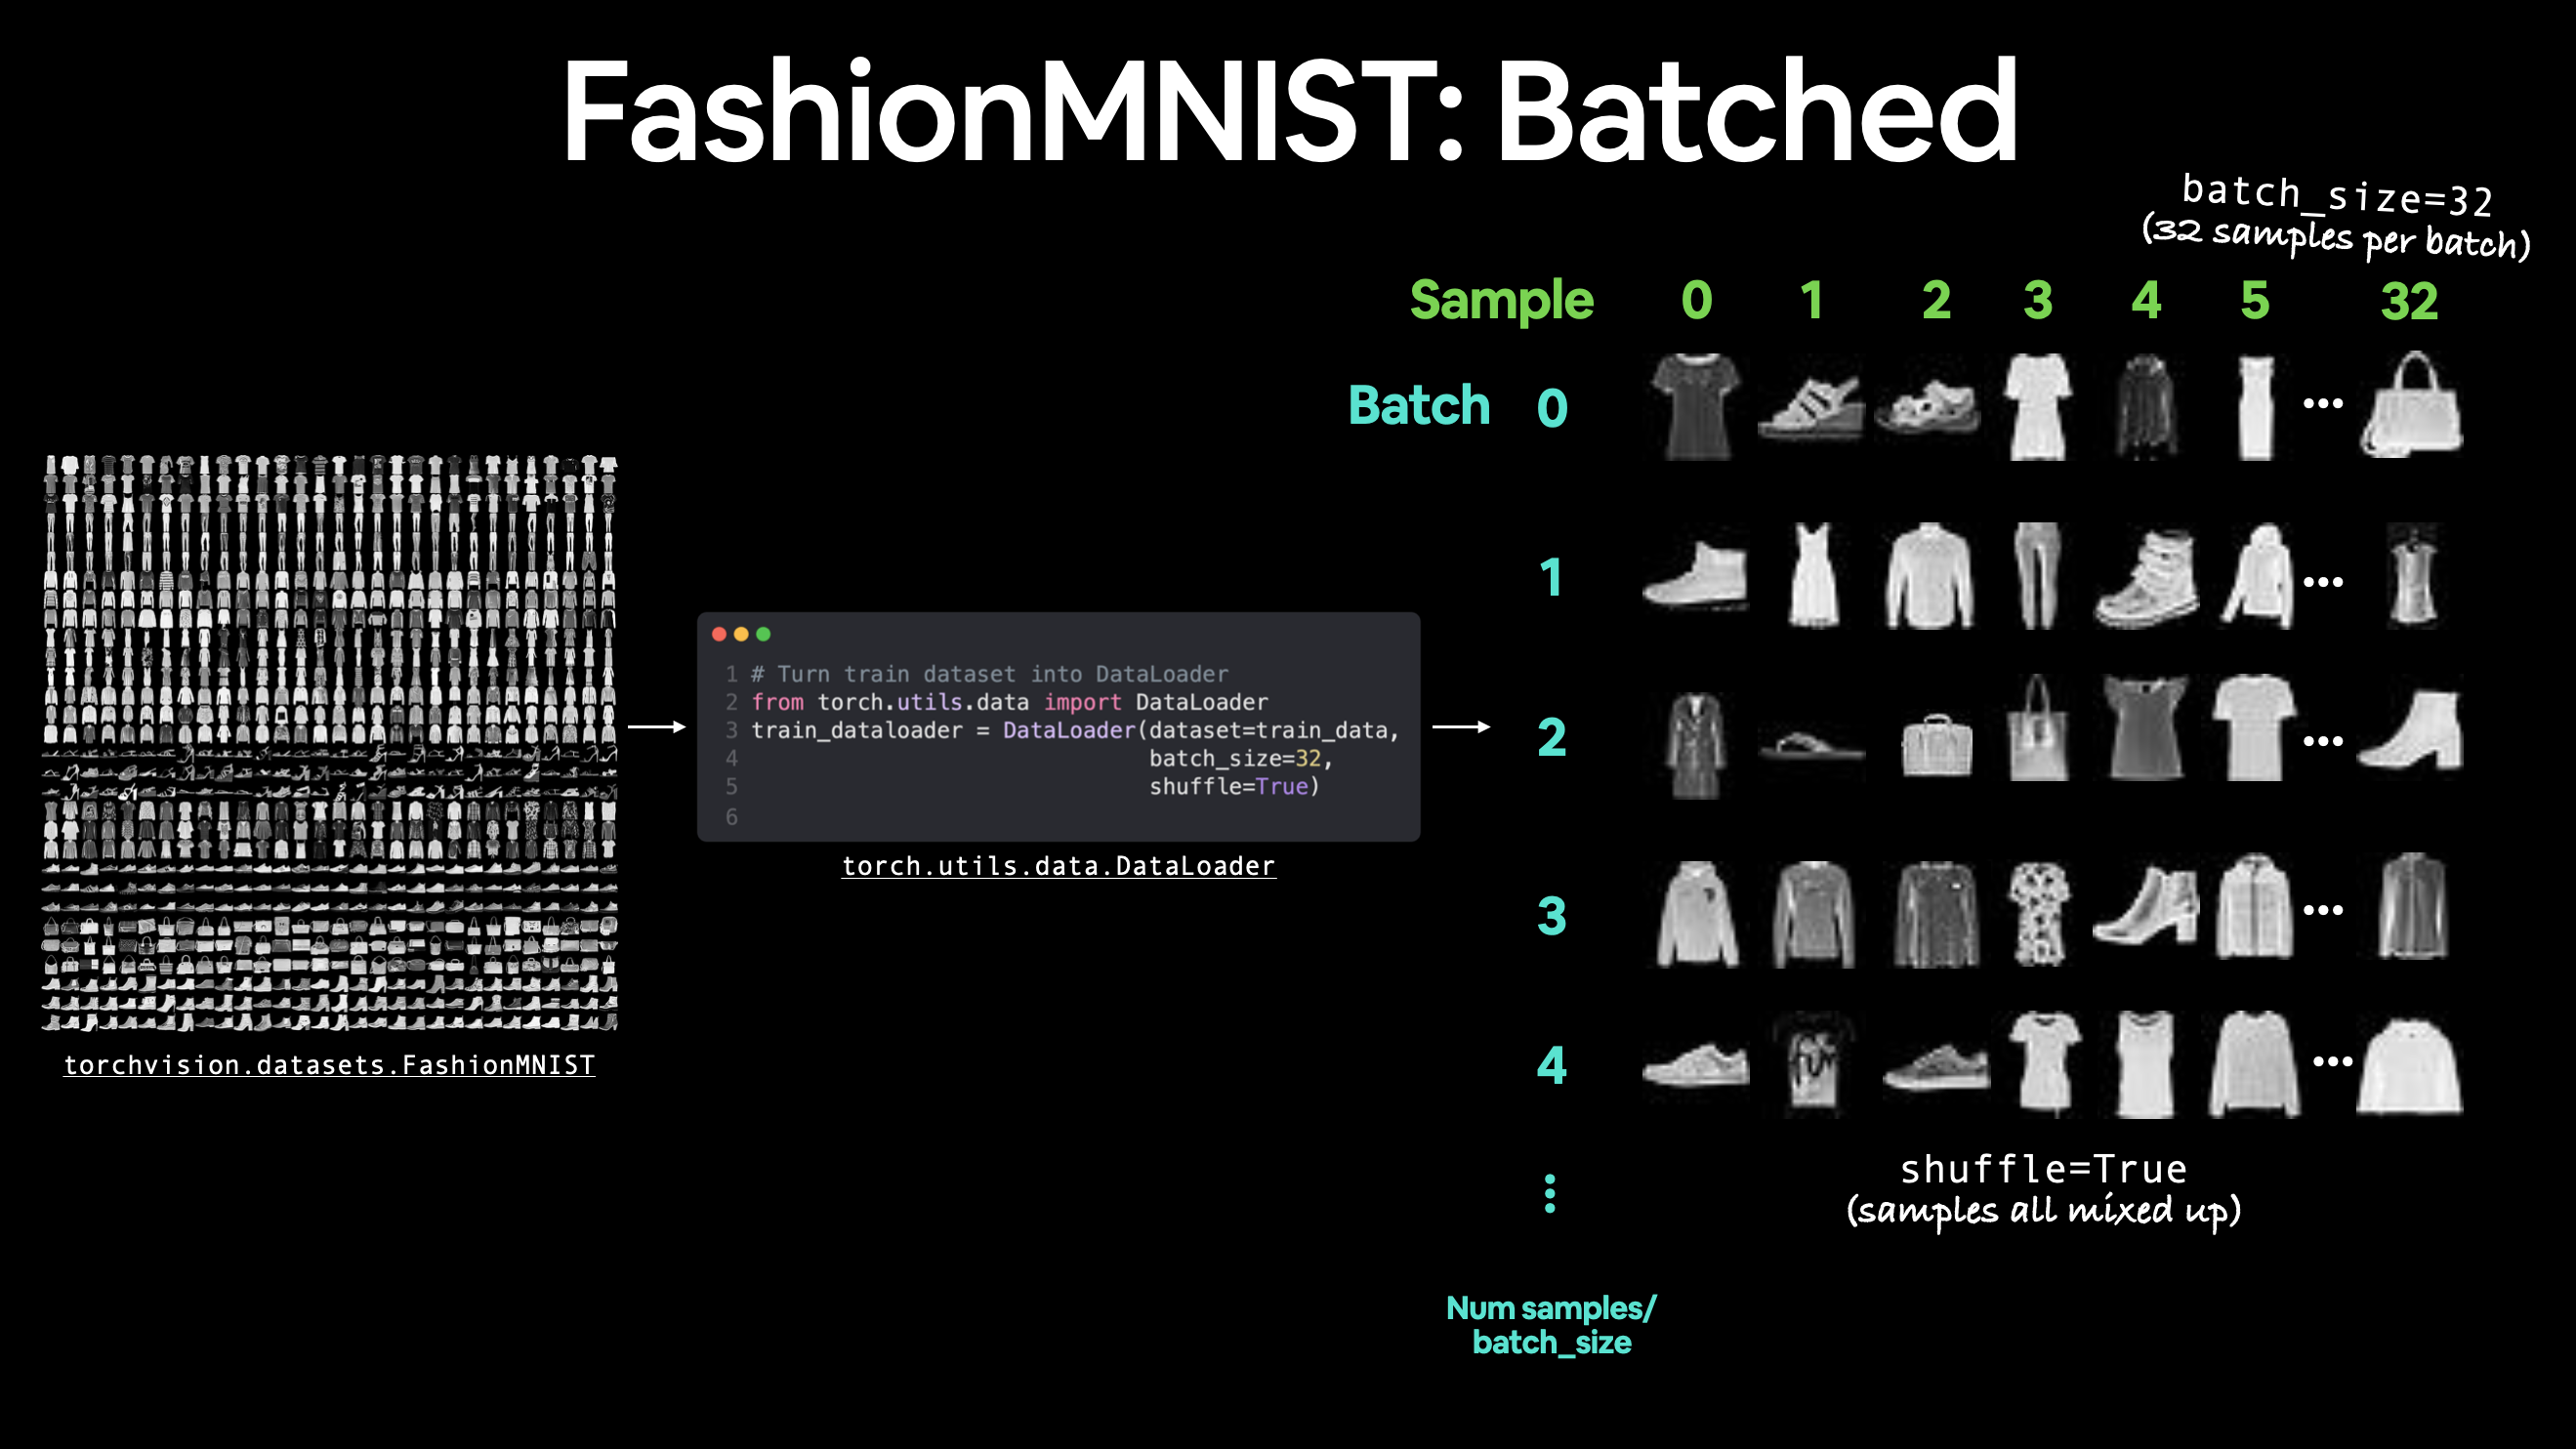

In [10]:
# Show the image
image_url = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-batching-fashionmnist.png"
Image(image_url, width=800, height=400)

In [56]:
# Create data loader
batch_size=32
train_loader = th.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_loader = th.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=True)


# Check the dataloaders
print(f"Training loader: {train_loader}")
print(f"Test loader: {test_loader}")


# Check the number of batches
print(f"Number of batches in training set: {len(train_loader)}")
print(f"Number of batches in test set: {len(test_loader)}")


Training loader: <torch.utils.data.dataloader.DataLoader object at 0x7fd575563d90>
Test loader: <torch.utils.data.dataloader.DataLoader object at 0x7fd575561840>
Number of batches in training set: 1875
Number of batches in test set: 313


In [57]:
# Check out what's inside the training dataloader
train_loader_iter = iter(train_loader)
train_features, train_labels = next(train_loader_iter)
print(f"train feature batch shape: {train_features.shape}")
print(f"train label batch shape: {train_labels.shape}")

# Check out what's inside the test dataloader
test_loader_iter = iter(test_loader)
test_features, test_labels = next(test_loader_iter)
print(f"test feature batch shape: {test_features.shape}")
print(f"test label batch shape: {test_labels.shape}")

train feature batch shape: torch.Size([32, 1, 28, 28])
train label batch shape: torch.Size([32])
test feature batch shape: torch.Size([32, 1, 28, 28])
test label batch shape: torch.Size([32])


#### Build a Baseline Model

In [58]:
# Create a flatten layer
flatten_model = th.nn.Flatten() # all nn modules function as a model (can do a forward pass)

# Get a batch of training data
train_features, train_labels = next(train_loader_iter)

# Flatten the sample
output = flatten_model(train_features[0]) # get the output of the model

# Print out what happened
print(f"Shape before flattening: {train_features[0].shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")


Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [59]:
# Create 4d torch random tensor
tensor_4d = th.rand(1, 1, 28, 28)
print(f"Shape of 4d tensor: {tensor_4d.shape}")

# Flatten the tensor
output = flatten_model(tensor_4d)
print(f"Shape after flattening: {output.shape}")

# Create 3d torch random tensor
tensor_3d = th.rand(1, 28, 28)
print(f"Shape of 3d tensor: {tensor_3d.shape}")

# Flatten the tensor
output = flatten_model(tensor_3d)
print(f"Shape after flattening: {output.shape}")

Shape of 4d tensor: torch.Size([1, 1, 28, 28])
Shape after flattening: torch.Size([1, 784])
Shape of 3d tensor: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [66]:
# Create a model

class FlattenModel(th.nn.Module):
    def __init__(self):
        super().__init__()
        layers = [
            th.nn.Flatten(),
            th.nn.Linear(28*28, 512),
            th.nn.ELU(),
            th.nn.Linear(512, 128),
            th.nn.ReLU(),
            th.nn.Linear(128, 32),
            th.nn.ReLU(),
            th.nn.Linear(32, 10)
        ]

        self.layers = th.nn.Sequential(*layers)

    def forward(self, inputs):
        return self.layers(inputs)
    


In [67]:
# Set fixed random seed
th.manual_seed(42)

In [68]:
# Set the device
device = th.device("cuda" if th.cuda.is_available() else "cpu")
print(f"Using {device} device")

Using cpu device


In [69]:
# Create an instance of the model
model = FlattenModel().to(device)

# Create a loss function
loss_fn = th.nn.CrossEntropyLoss()

# Create an optimizer
optimizer = th.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

# Create a metric
metric_fn = tm.Accuracy(task="multiclass", num_classes=10)

In [70]:
# Create the training and evaluaating loop
def train_loop(train_dataloader, test_dataloader, model, loss_fn, optimizer, metric_fn, num_epochs=50):
    """
    Train a model on a training set and evaluate it on a test set.

    Args:
        train_dataloader (th.utils.data.DataLoader): Training dataloader
        test_dataloader (th.utils.data.DataLoader): Test dataloader
        model (th.nn.Module): Model to train
        loss_fn (th.nn.Module): Loss function
        optimizer (th.optim.Optimizer): Optimizer to use
        metric_fn (th.nn.Module): Metric function
        num_epochs (int, optional): Number of epochs to train for. Defaults to 50.
    """
    # Get the number of epochs to train for
    epochs = num_epochs

    # Train the model
    for epoch in tqdm(range(epochs)):
        print(f"Epoch {epoch+1}/{epochs}")
        print("-"*10)

        # Train the model
        model.train()

        train_loss = 0
        train_metric = 0

        for _, (X, y) in enumerate(train_dataloader):
            # Move data to device
            X = X.to(device)
            y = y.to(device)

            # Make predictions
            y_pred = model(X)

            # Calculate loss
            loss = loss_fn(y_pred, y)
            train_loss += loss.item()

            # Calculate metric
            metric = metric_fn(y_pred, y)
            train_metric += metric.item()

            # Backpropagation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # Evaluate the model
        model.eval()

        test_loss = 0
        test_metric = 0

        with th.inference_mode():
            for X, y in test_dataloader:
                # Move data to device
                X = X.to(device)
                y = y.to(device)

                # Make predictions
                y_pred = model(X)

                # Calculate loss
                loss = loss_fn(y_pred, y)
                test_loss += loss.item()

                # Calculate metric
                metric = metric_fn(y_pred, y)
                test_metric += metric.item()

        # Calculate the average loss and metric
        train_loss /= len(train_dataloader)
        train_metric /= len(train_dataloader)
        test_loss /= len(test_dataloader)
        test_metric /= len(test_dataloader)

        # Print the results
        print(f"Train loss: {train_loss:.4f} | Train metric: {train_metric:.4f}")
        print(f"Test loss: {test_loss:.4f} | Test metric: {test_metric:.4f}")

        return model,train_loss, train_metric, test_loss, test_metric


In [71]:
# Fitting the model
model, train_loss, train_metric, test_loss, test_metric = train_loop(train_loader, test_loader, model, loss_fn, optimizer, metric_fn, num_epochs=50)

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 1/50
----------
Train loss: 0.5052 | Train metric: 0.8139
Test loss: 0.4295 | Test metric: 0.8433
